Importando as bibliotecas 


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
from sklearn import mixture

Funções Auxiliares

In [15]:
def print_gmm_params(gmm, iteration):


    print(f"  Iteração {iteration+1}:")

    for i in range(gmm.n_components):

        print(f"  Componente {i+1}:")

        print(f"    Peso (Tamanho): {gmm.weights_[i]:.3f}")

        print(f"    Média (Centro): {np.round(gmm.means_[i], 2)}")

        print(f"    Covariância (Formato - Diagonal): {np.round(np.diag(gmm.covariances_[i]), 2)}\n")

    print(f"-------------------------------------------------------------------------------------")
    

def plot_gmm_step(ax, gmm, X, title):

    ax.scatter(X[:, 0], X[:, 1], s=5, color='navy', alpha=0.6)


    for n in range(gmm.n_components):
        
        mean = gmm.means_[n]
        cov = gmm.covariances_[n]
        color = 'red' if n == 0 else 'green'

        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

        width, height = 2 * 2 * np.sqrt(eigenvalues)

        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                          facecolor='none', edgecolor=color, linewidth=2)
        

        ax.add_patch(ellipse)

        ax.scatter(mean[0], mean[1], marker='X', s=100, color='black')
    

    ax.set_title(title)
    ax.set_aspect('equal') 
    ax.grid(True)


Gerando os dados sintéticos

In [16]:
n_samples = 300

np.random.seed(0)

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

X_train = np.vstack([shifted_gaussian, stretched_gaussian])

Treinamendo do modelo e visualização do EM

Iniciando o processo de Expectation-Maximization...
  Iteração 1:
  Componente 1:
    Peso (Tamanho): 0.495
    Média (Centro): [9.77 9.86]
    Covariância (Formato - Diagonal): [106.51 101.11]

  Componente 2:
    Peso (Tamanho): 0.505
    Média (Centro): [10.   10.05]
    Covariância (Formato - Diagonal): [106.83 101.66]

-------------------------------------------------------------------------------------
  Iteração 2:
  Componente 1:
    Peso (Tamanho): 0.495
    Média (Centro): [9.7  9.78]
    Covariância (Formato - Diagonal): [107.17 101.42]

  Componente 2:
    Peso (Tamanho): 0.505
    Média (Centro): [10.08 10.13]
    Covariância (Formato - Diagonal): [106.14 101.31]

-------------------------------------------------------------------------------------
  Iteração 3:
  Componente 1:
    Peso (Tamanho): 0.495
    Média (Centro): [9.56 9.64]
    Covariância (Formato - Diagonal): [107.49 101.35]

  Componente 2:
    Peso (Tamanho): 0.505
    Média (Centro): [10.21 10.26]
    Covar

c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


  Iteração 6:
  Componente 1:
    Peso (Tamanho): 0.494
    Média (Centro): [8.44 8.56]
    Covariância (Formato - Diagonal): [108.23  99.55]

  Componente 2:
    Peso (Tamanho): 0.506
    Média (Centro): [11.31 11.31]
    Covariância (Formato - Diagonal): [101.11  99.48]

-------------------------------------------------------------------------------------
  Iteração 7:
  Componente 1:
    Peso (Tamanho): 0.491
    Média (Centro): [7.65 7.81]
    Covariância (Formato - Diagonal): [106.91  96.87]

  Componente 2:
    Peso (Tamanho): 0.509
    Média (Centro): [12.05 12.02]
    Covariância (Formato - Diagonal): [96.99 97.03]

-------------------------------------------------------------------------------------
  Iteração 8:
  Componente 1:
    Peso (Tamanho): 0.485
    Média (Centro): [6.61 6.79]
    Covariância (Formato - Diagonal): [102.92  91.48]

  Componente 2:
    Peso (Tamanho): 0.515
    Média (Centro): [12.98 12.93]
    Covariância (Formato - Diagonal): [90.6  92.48]

----------

c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converg

  Iteração 11:
  Componente 1:
    Peso (Tamanho): 0.466
    Média (Centro): [2.33 2.5 ]
    Covariância (Formato - Diagonal): [59.43 45.44]

  Componente 2:
    Peso (Tamanho): 0.534
    Média (Centro): [16.48 16.45]
    Covariância (Formato - Diagonal): [54.53 59.42]

-------------------------------------------------------------------------------------
  Iteração 12:
  Componente 1:
    Peso (Tamanho): 0.471
    Média (Centro): [0.6  0.72]
    Covariância (Formato - Diagonal): [28.99 15.79]

  Componente 2:
    Peso (Tamanho): 0.529
    Média (Centro): [18.17 18.18]
    Covariância (Formato - Diagonal): [30.45 33.94]

-------------------------------------------------------------------------------------
  Iteração 13:
  Componente 1:
    Peso (Tamanho): 0.497
    Média (Centro): [-0.15 -0.07]
    Covariância (Formato - Diagonal): [11.39  0.9 ]

  Componente 2:
    Peso (Tamanho): 0.503
    Média (Centro): [19.79 19.84]
    Covariância (Formato - Diagonal): [3.2  3.58]

---------------

c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\fgrne\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converg

  Iteração 17:
  Componente 1:
    Peso (Tamanho): 0.500
    Média (Centro): [-0.14 -0.07]
    Covariância (Formato - Diagonal): [11.33  0.88]

  Componente 2:
    Peso (Tamanho): 0.500
    Média (Centro): [19.91 19.98]
    Covariância (Formato - Diagonal): [1.02 0.99]

-------------------------------------------------------------------------------------
  Iteração 18:
  Componente 1:
    Peso (Tamanho): 0.500
    Média (Centro): [-0.14 -0.07]
    Covariância (Formato - Diagonal): [11.33  0.88]

  Componente 2:
    Peso (Tamanho): 0.500
    Média (Centro): [19.91 19.98]
    Covariância (Formato - Diagonal): [1.02 0.99]

-------------------------------------------------------------------------------------
  Iteração 19:
  Componente 1:
    Peso (Tamanho): 0.500
    Média (Centro): [-0.14 -0.07]
    Covariância (Formato - Diagonal): [11.33  0.88]

  Componente 2:
    Peso (Tamanho): 0.500
    Média (Centro): [19.91 19.98]
    Covariância (Formato - Diagonal): [1.02 0.99]

---------------

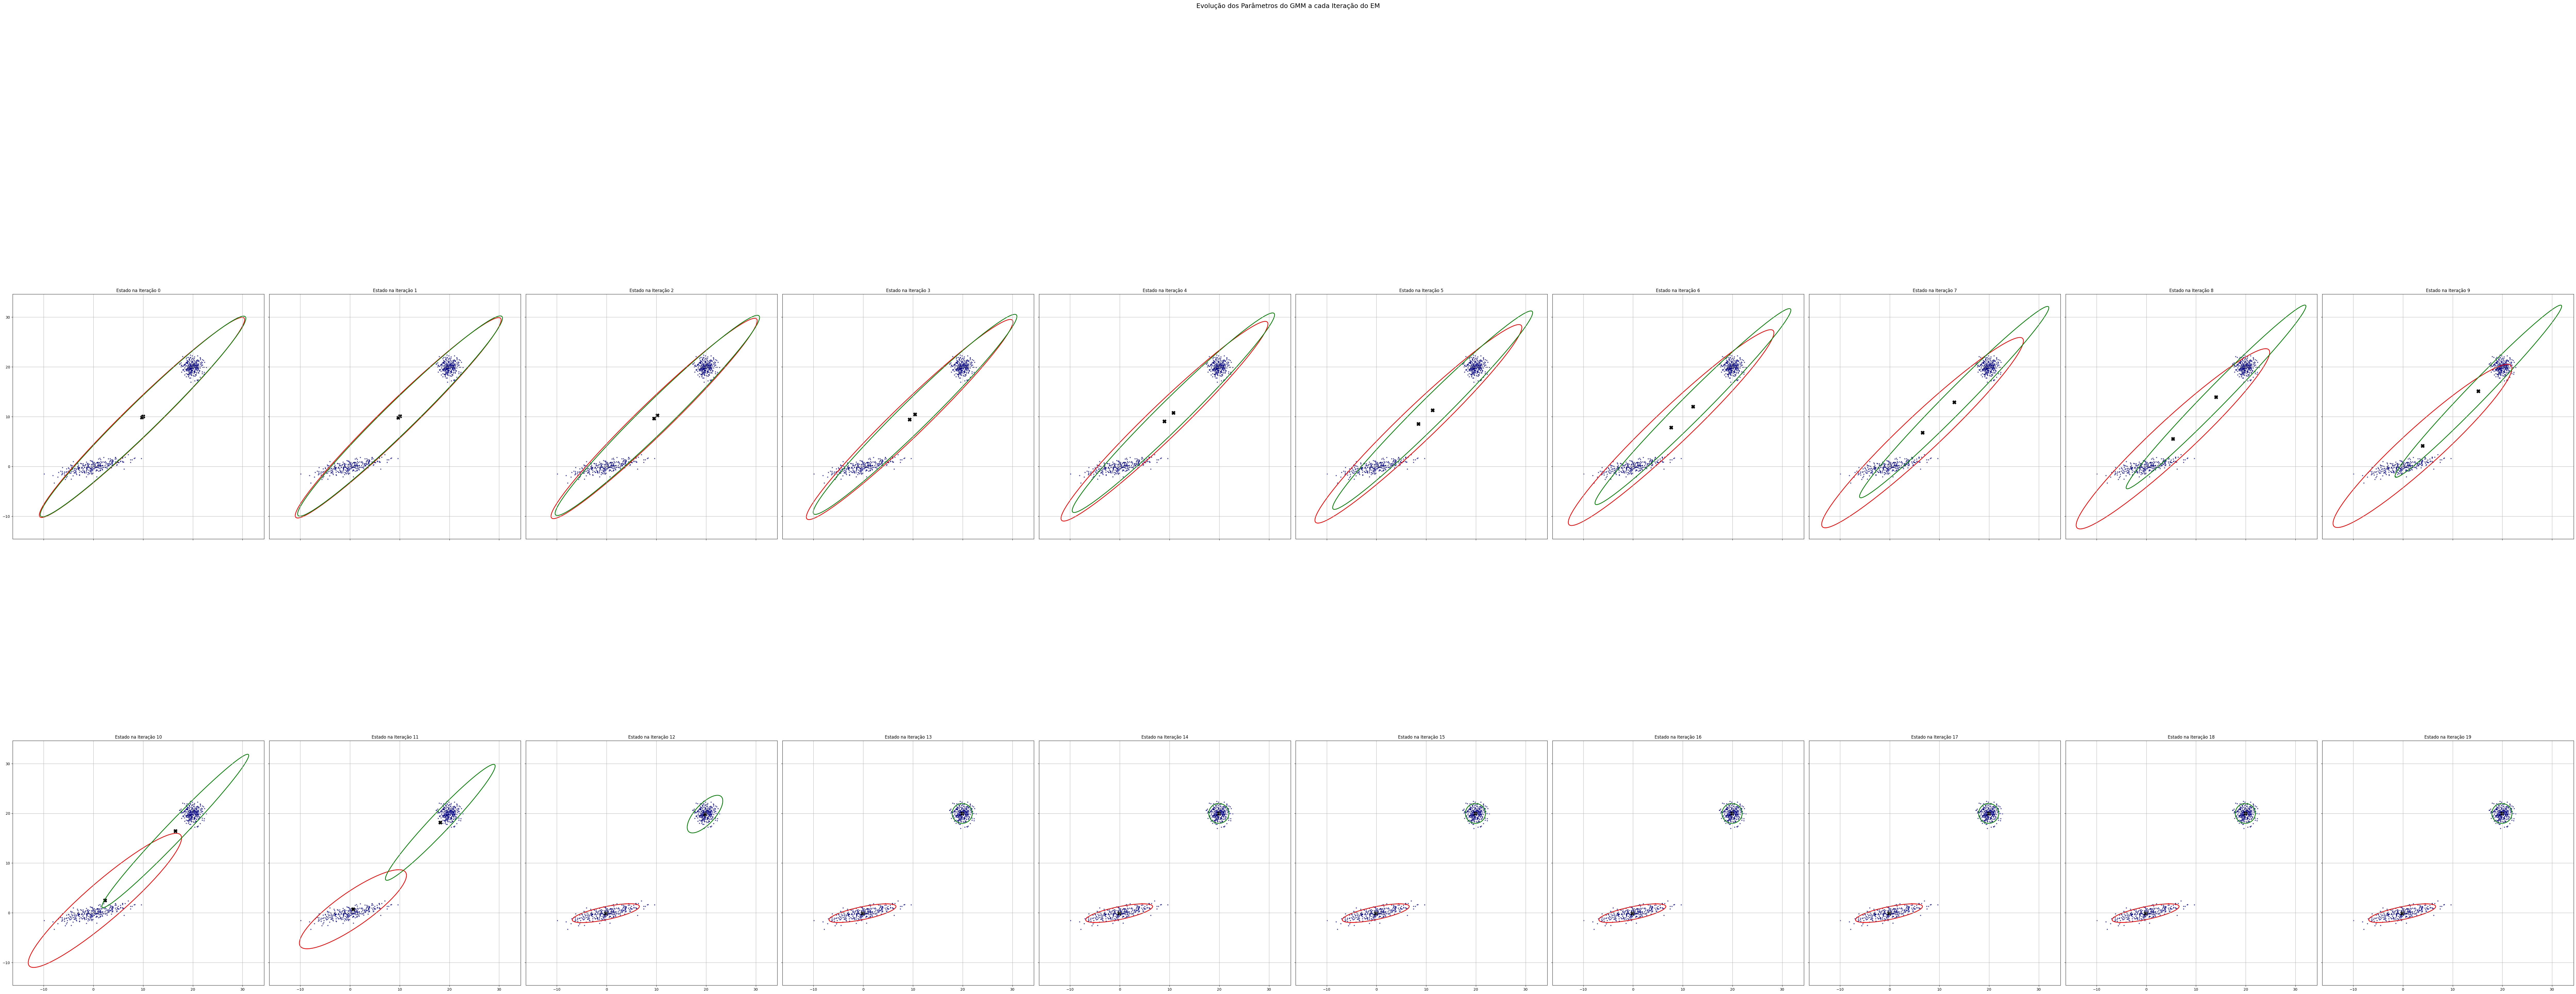

In [17]:

gmm = mixture.GaussianMixture(n_components=2, covariance_type="full",
                              max_iter=1, warm_start=True,
                              n_init=1, init_params='random', random_state=1)


gmm._initialize_parameters(X_train, np.random.RandomState(1))


n_iterations = 20
fig, axes = plt.subplots(2, 10, figsize=(100, 50), sharex=True, sharey=True)
axes = axes.ravel() 


print("Iniciando o processo de Expectation-Maximization...")

for i in range(n_iterations):
    
    print_gmm_params(gmm, i)
    
    plot_gmm_step(axes[i], gmm, X_train, f"Estado na Iteração {i}")
    
    gmm.fit(X_train)

print(f"\nApós {n_iterations} iterações, o modelo convergiu? {gmm.converged_}")

plt.suptitle("Evolução dos Parâmetros do GMM a cada Iteração do EM", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Mostrando o quão bem os pontos estão sendo descritos pelo modelo


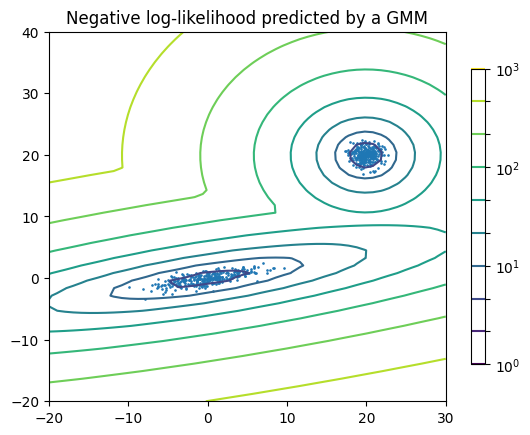

In [18]:
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

Observando a log-likelihood de cada gausiana

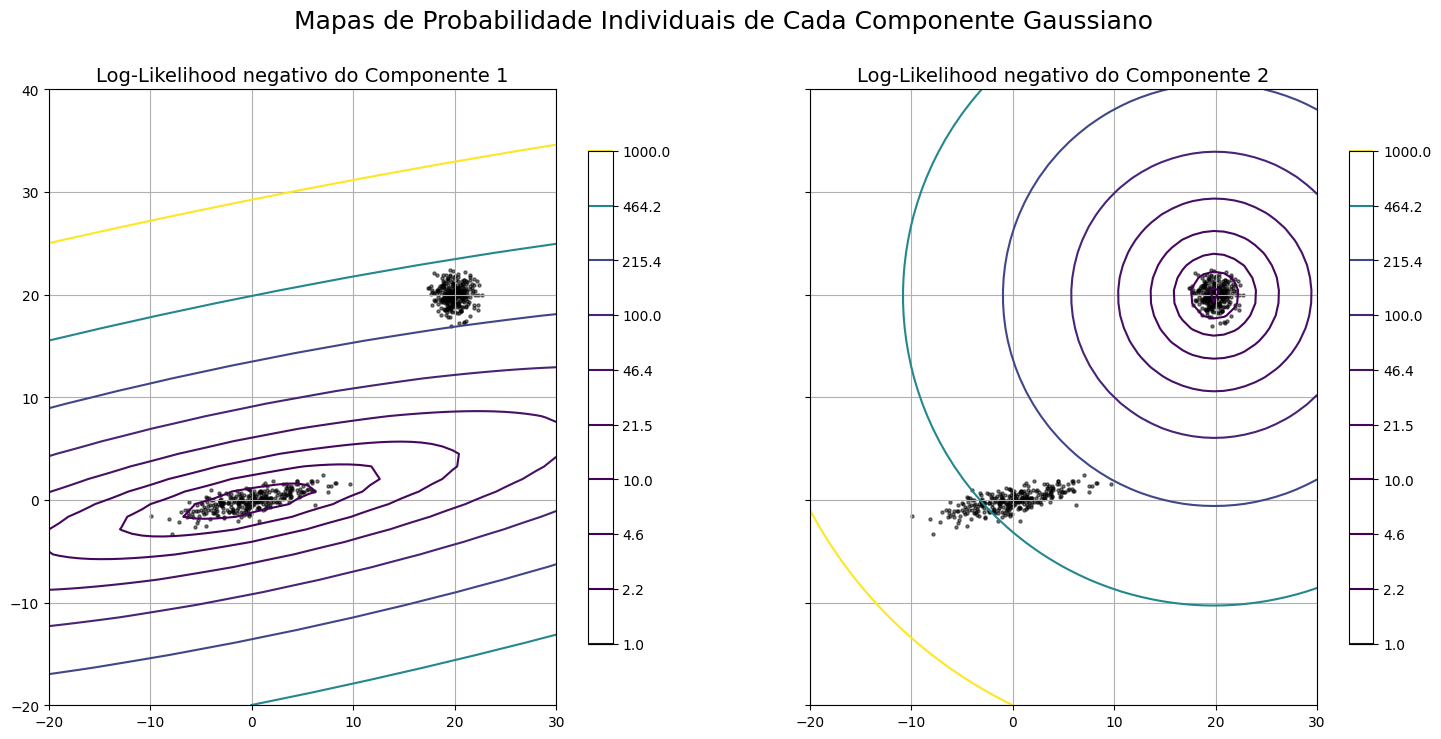

In [19]:
x_grid = np.linspace(-20.0, 30.0)
y_grid = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x_grid, y_grid)
XX = np.array([X.ravel(), Y.ravel()]).T


mean1, cov1 = gmm.means_[0], gmm.covariances_[0]
mean2, cov2 = gmm.means_[1], gmm.covariances_[1]

gaussiana_1 = multivariate_normal(mean=mean1, cov=cov1)
gaussiana_2 = multivariate_normal(mean=mean2, cov=cov2)


Z1 = -gaussiana_1.logpdf(XX)
Z2 = -gaussiana_2.logpdf(XX)

Z1 = Z1.reshape(X.shape)
Z2 = Z2.reshape(X.shape)


fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
ax1, ax2 = axes

ax1.set_title("Log-Likelihood negativo do Componente 1", fontsize=14)

CS1 = ax1.contour(X, Y, Z1, levels=np.logspace(0, 3, 10), cmap='viridis')
fig.colorbar(CS1, ax=ax1, shrink=0.8) 

ax1.scatter(X_train[:, 0], X_train[:, 1], s=5, color='black', alpha=0.5)
ax1.axis('tight')
ax1.grid(True)

ax2.set_title("Log-Likelihood negativo do Componente 2", fontsize=14)

CS2 = ax2.contour(X, Y, Z2, levels=np.logspace(0, 3, 10), cmap='viridis')
fig.colorbar(CS2, ax=ax2, shrink=0.8)

ax2.scatter(X_train[:, 0], X_train[:, 1], s=5, color='black', alpha=0.5)
ax2.axis('tight')
ax2.grid(True)

plt.suptitle("Mapas de Probabilidade Individuais de Cada Componente Gaussiano", fontsize=18)
plt.show()

In [21]:
print(f"Log-Likelihood (lower bound) final: {gmm.lower_bound_:.4f}")

Log-Likelihood (lower bound) final: -3.9300
